In [1]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression , LinearRegression
from sklearn.model_selection import cross_val_score
import pandas as pd
from sklearn.model_selection import cross_val_score

In [2]:
!pip install --upgrade scikit-learn mlxtend

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 49.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 48.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 41.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninst

In [3]:
df = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

lr = LogisticRegression()
sel = EFS(lr , max_features = 4, scoring='accuracy' , cv =5)


In [5]:
model = sel.fit(df.iloc[: , :4] , df['species'])

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  loss = "log"
Features: 15/15

In [6]:
model.best_score_

np.float64(0.9733333333333334)

In [7]:
model.best_feature_names_

('sepal_length', 'sepal_width', 'petal_length', 'petal_width')

In [8]:
model.subsets_

{0: {'feature_idx': (0,),
  'cv_scores': array([0.66666667, 0.73333333, 0.76666667, 0.76666667, 0.83333333]),
  'avg_score': np.float64(0.7533333333333333),
  'feature_names': ('sepal_length',)},
 1: {'feature_idx': (1,),
  'cv_scores': array([0.53333333, 0.56666667, 0.53333333, 0.53333333, 0.63333333]),
  'avg_score': np.float64(0.5599999999999999),
  'feature_names': ('sepal_width',)},
 2: {'feature_idx': (2,),
  'cv_scores': array([0.93333333, 1.        , 0.9       , 0.93333333, 1.        ]),
  'avg_score': np.float64(0.9533333333333334),
  'feature_names': ('petal_length',)},
 3: {'feature_idx': (3,),
  'cv_scores': array([1.        , 0.96666667, 0.9       , 0.93333333, 1.        ]),
  'avg_score': np.float64(0.96),
  'feature_names': ('petal_width',)},
 4: {'feature_idx': (0, 1),
  'cv_scores': array([0.73333333, 0.83333333, 0.76666667, 0.86666667, 0.9       ]),
  'avg_score': np.float64(0.8200000000000001),
  'feature_names': ('sepal_length', 'sepal_width')},
 5: {'feature_idx': 

In [9]:
metric_df = pd.DataFrame.from_dict(model.get_metric_dict()).T
metric_df

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
0,"(0,)","[0.6666666666666666, 0.7333333333333333, 0.766...",0.753333,"(sepal_length,)",0.069612,0.05416,0.02708
1,"(1,)","[0.5333333333333333, 0.5666666666666667, 0.533...",0.56,"(sepal_width,)",0.049963,0.038873,0.019437
2,"(2,)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(petal_length,)",0.051412,0.04,0.02
3,"(3,)","[1.0, 0.9666666666666667, 0.9, 0.9333333333333...",0.96,"(petal_width,)",0.049963,0.038873,0.019437
4,"(0, 1)","[0.7333333333333333, 0.8333333333333334, 0.766...",0.82,"(sepal_length, sepal_width)",0.079462,0.061824,0.030912
5,"(0, 2)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(sepal_length, petal_length)",0.051412,0.04,0.02
6,"(0, 3)","[0.9333333333333333, 0.9666666666666667, 0.933...",0.953333,"(sepal_length, petal_width)",0.034274,0.026667,0.013333
7,"(1, 2)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(sepal_width, petal_length)",0.051412,0.04,0.02
8,"(1, 3)","[0.9333333333333333, 0.9666666666666667, 0.9, ...",0.94,"(sepal_width, petal_width)",0.032061,0.024944,0.012472
9,"(2, 3)","[0.9666666666666667, 0.9666666666666667, 0.933...",0.96,"(petal_length, petal_width)",0.032061,0.024944,0.012472


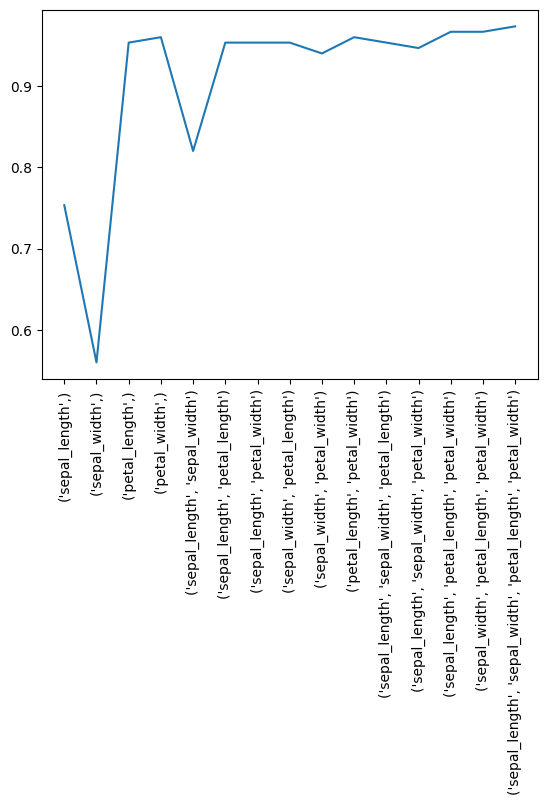

In [10]:
import matplotlib.pyplot as plt

plt.plot([str(k) for k in metric_df['feature_names']] , metric_df['avg_score'])
plt.xticks(rotation=90)
plt.show()

# **Regression Example**

In [11]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df['medv'], test_size=0.2, random_state=1)

In [13]:
print(X_train.shape)
print(X_test.shape)

(404, 13)
(102, 13)


In [14]:
X_train.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
42,0.14150,0.0,6.91,0,0.448,6.169,6.6,5.7209,3,233,17.9,383.37,5.81
58,0.15445,25.0,5.13,0,0.453,6.145,29.2,7.8148,8,284,19.7,390.68,6.86
385,16.81180,0.0,18.10,0,0.700,5.277,98.1,1.4261,24,666,20.2,396.90,30.81
78,0.05646,0.0,12.83,0,0.437,6.232,53.7,5.0141,5,398,18.7,386.40,12.34
424,8.79212,0.0,18.10,0,0.584,5.565,70.6,2.0635,24,666,20.2,3.65,17.16


In [15]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train =  sc.fit_transform(X_train)
X_test =  sc.transform(X_test)

In [16]:
X_train

array([[-0.3892494 , -0.49559343, -0.60928978, ..., -0.24857777,
         0.28674182, -0.96685016],
       [-0.38783184,  0.57923879, -0.86952633, ...,  0.58214721,
         0.36669519, -0.82116789],
       [ 1.43554993, -0.49559343,  1.02669166, ...,  0.81290414,
         0.43472666,  2.50177533],
       ...,
       [ 0.23804008, -0.49559343,  1.02669166, ...,  0.81290414,
         0.43472666,  0.9145323 ],
       [-0.36856615, -0.49559343, -0.713092  , ..., -0.47933471,
         0.21433534, -0.26341291],
       [-0.39596611, -0.49559343, -0.74818007, ...,  0.35139027,
         0.43472666, -0.55616491]])

In [17]:
# baseline model
import numpy as np
from sklearn.metrics import r2_score
model = LinearRegression()


print("training",np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring='r2')))
print("testing",np.mean(cross_val_score(model, X_test, y_test, cv=5, scoring='r2')))

training 0.7025123301096212
testing 0.6514899901155402


In [18]:
lr = LinearRegression()

exh = EFS(lr, max_features=13, scoring='r2', cv=10, print_progress=True,n_jobs=-1)

sel = exh.fit(X_train, y_train)

AttributeError: 'LinearRegression' object has no attribute 'tol'

In [ ]:
sel.best_score_

In [ ]:
sel.best_feature_names_

In [ ]:
metric_df = pd.DataFrame.from_dict(sel.get_metric_dict()).T
metric_df

In [ ]:
def adjust_r2(r2, num_examples, num_features):
    coef = (num_examples - 1) / (num_examples - num_features - 1)
    return 1 - (1 - r2) * coef

In [ ]:
metric_df['observations'] = 404
metric_df['num_features'] = metric_df['feature_idx'].apply(lambda x:len(x))
metric_df['adjusted_r2'] = adjust_r2(metric_df['avg_score'],metric_df['observations'],metric_df['num_features'])

In [ ]:
metric_df.sort_values('adjusted_r2',ascending=False)

In [ ]:
X_train_sel = sel.transform(X_train)
X_test_sel = sel.transform(X_test)

In [ ]:
model = LinearRegression()

print("training",np.mean(cross_val_score(model, X_train_sel, y_train, cv=5, scoring='r2')))
print("testing",np.mean(cross_val_score(model, X_test_sel, y_test, cv=5, scoring='r2')))

# **Sequential Backward Elimination**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# load the dataset
data = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')

# separate the target variable
X = data.drop("medv", axis=1)
y = data['medv']

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print(X_train.shape)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
import numpy as np
model = LinearRegression()

print("training",np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring='r2')))
print("testing",np.mean(cross_val_score(model, X_test, y_test, cv=5, scoring='r2')))

In [ ]:
lr = LinearRegression()

# perform backward elimination
sfs = SFS(lr, k_features='best', forward=False, floating=False, scoring='r2',cv=5)

sfs.fit(X_train, y_train)

In [ ]:
sfs.k_feature_idx_

In [ ]:
metric_df = pd.DataFrame.from_dict(sfs.get_metric_dict()).T

metric_df['observations'] = 404
metric_df['num_features'] = metric_df['feature_idx'].apply(lambda x:len(x))
metric_df['adjusted_r2'] = adjust_r2(metric_df['avg_score'],metric_df['observations'],metric_df['num_features'])

metric_df

In [ ]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs


fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_err',)

plt.title('Sequential Backward Elimination (w. StdErr)')
plt.grid()
plt.show()

In [ ]:
X_train_sel = sfs.transform(X_train)
X_test_sel = sfs.transform(X_test)

model = LinearRegression()

print("training",np.mean(cross_val_score(model, X_train_sel, y_train, cv=5, scoring='r2')))
print("testing",np.mean(cross_val_score(model, X_test_sel, y_test, cv=5, scoring='r2')))